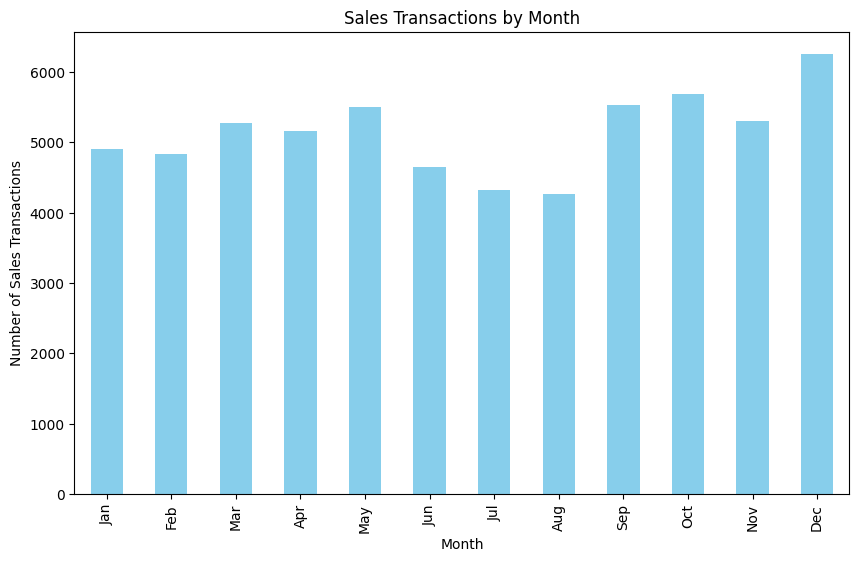

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar


# Load your data into a Pandas DataFrame (assuming it's in 'data.csv')
data = pd.read_csv('data.csv')

# Convert the date column to a datetime data type
data['Date'] = pd.to_datetime(data['Date'], format= "mixed", dayfirst= True, errors = 'coerce')

# Extract the month from the Date column
data['Month'] = data['Date'].dt.month

# Count the number of sales transactions for each month
monthly_sales_count = data.groupby('Month')['Transaction_ID'].count()

plt.figure(figsize=(10, 6))
monthly_sales_count.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Sales Transactions')
plt.title('Sales Transactions by Month')
plt.xticks(range(0, 12), calendar.month_abbr[1:])  # Label the x-axis with month abbreviations
plt.show()

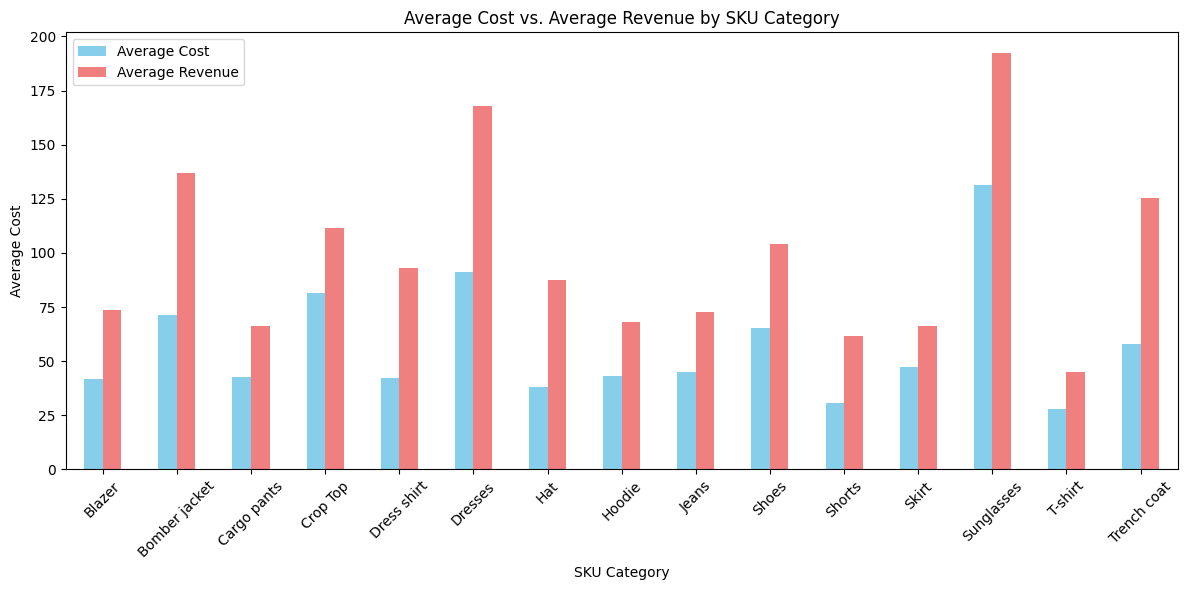

In [6]:
sku_category_summary = data.groupby('SKU_Category').agg({
    'Operational_Cost': 'mean',
    'Sales_Amount': 'mean'
})

# Rename the columns for clarity
sku_category_summary.columns = ['Average Cost', 'Average Revenue']

# Create a bar graph to compare average cost and total profit for each SKU Category
plt.figure(figsize=(12, 6))
sku_category_summary.plot(kind='bar', ax=plt.gca(), secondary_y='Total Profit', color=['skyblue', 'lightcoral'])
plt.xlabel('SKU Category')
plt.ylabel('Average Cost')
plt.title('Average Cost vs. Average Revenue by SKU Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the graph
plt.show()